# Step 1: Create and Save Sample Datasets

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Create sample orders dataset
orders_data = {
    'user_id': [1, 2, 3, 4, 5],
    'order_id': [101, 102, 103, 104, 105],
    'product_id': [1001, 1002, 1003, 1004, 1005],
    'quantity': [1, 2, 3, 4, 5],
    'prices': [10.99, 14.99, 7.99, 11.99, 5.99],
    'state': ['California', 'Texas', 'New York', 'Florida', 'Illinois']
}

# Create DataFrame
df_orders = pd.DataFrame(orders_data)

# Create sample customers dataset
customers_data = {
    'user_id': [1, 2, 3, 4, 5],
    'First Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Surname': ['Smith', 'Johnson', 'Williams', 'Jones', 'Brown'],
    'Age': [25, 34, 28, 45, 23],
    'income': [48000, 52000, 40000, 62000, 38000]
}

# Create DataFrame
df_customers = pd.DataFrame(customers_data)

# Save the datasets as CSV files in the specified location
df_orders.to_csv(r"C:\Users\Asus\Music\CareerFoundry_Python_Session\orders_sample.csv", index=False)
df_customers.to_csv(r"C:\Users\Asus\Music\CareerFoundry_Python_Session\customers_sample.csv", index=False)

# Step 2: Load the Data and Perform Analysis

# Step 1: Load the Data and Check Columns

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.io as pio

# Set default renderer to 'notebook'
pio.renderers.default = 'notebook'

# Define the file paths
orders_file = r"C:\Users\Asus\Music\CareerFoundry_Python_Session\orders_sample.csv"
customers_file = r"C:\Users\Asus\Music\CareerFoundry_Python_Session\customers_sample.csv"

# Load the datasets
df_orders = pd.read_csv(orders_file)
df_customers = pd.read_csv(customers_file)

# Check if 'user_id' column exists in both dataframes
if 'user_id' in df_orders.columns and 'user_id' in df_customers.columns:
    # Merge the datasets on 'user_id' (if applicable)
    df = df_orders.merge(df_customers, on="user_id", how="left")
    # Display the first few rows to check the data
    display(df.head())
    
    # Print column names to identify 'state' column
    print("Columns in merged dataframe:")
    print(df.columns)
else:
    print("Error: 'user_id' column not found in one or both of the dataframes.")
    # Create an empty DataFrame if merge fails
    df = pd.DataFrame()

,user_id,order_id,product_id,quantity,prices,state,First Name,Surname,Age,income
0,1,101,1001,1,10.99,California,Alice,Smith,25,48000
1,2,102,1002,2,14.99,Texas,Bob,Johnson,34,52000
2,3,103,1003,3,7.99,New York,Charlie,Williams,28,40000
3,4,104,1004,4,11.99,Florida,David,Jones,45,62000
4,5,105,1005,5,5.99,Illinois,Eve,Brown,23,38000


Columns in merged dataframe:
Index(['user_id', 'order_id', 'product_id', 'quantity', 'prices', 'state',
       'First Name', 'Surname', 'Age', 'income'],
      dtype='object')


# Step 2: Data Cleaning

In [3]:
# Drop unnecessary columns
df = df.drop(columns=['First Name', 'Surname'], errors='ignore')

# Check column names
df.columns

Index(['user_id', 'order_id', 'product_id', 'quantity', 'prices', 'state',
       'Age', 'income'],
      dtype='object')

# Step 3: Assign Regions to States


In [4]:
# Define US regions
regions = {
    'Northeast': ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania'],
    'Midwest': ['Ohio', 'Michigan', 'Indiana', 'Wisconsin', 'Illinois', 'Minnesota', 'Iowa', 'Missouri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas'],
    'South': ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'],
    'West': ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']
}

# Function to get region
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Unknown'

# Replace 'state' with the actual column name if different
state_column_name = 'state'  # Update with the correct column name if necessary
df['Region'] = df[state_column_name].apply(get_region)

# Check the data
df[[state_column_name, 'Region']].head()

,state,Region
0,California,West
1,Texas,South
2,New York,Northeast
3,Florida,South
4,Illinois,Midwest


# Step 4: Customer Distribution by Region

C:\Users\Asus\AppData\Local\Temp\ipykernel_20780\3152623679.py:35: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.

C:\Users\Asus\anaconda3\New folder\envs\20th_century\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



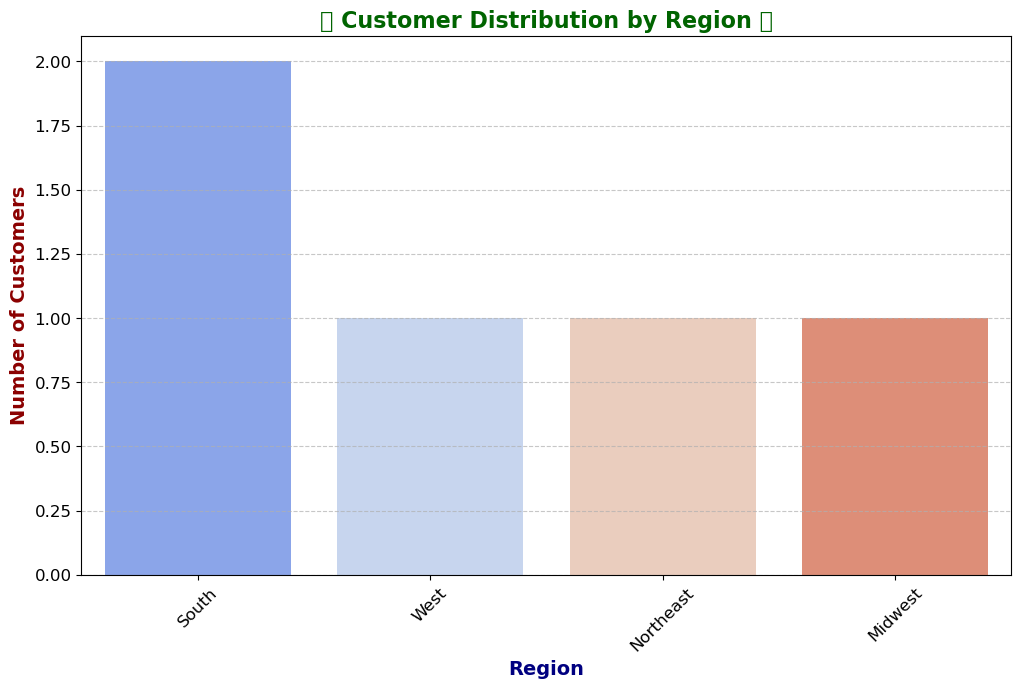

In [8]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Define save path
vis_path = r"C:\Users\Asus\OneDrive\Pictures\my python session projects\Export Visualizations as PNG Files\Analysis\Visualizations"

# Ensure the directory exists
os.makedirs(vis_path, exist_ok=True)

# Count customers per region
region_dist = df['Region'].value_counts().reset_index()
region_dist.columns = ['Region', 'Customer Count']

## 🎨 **Matplotlib & Seaborn (Enhanced Static Visualization)**
plt.figure(figsize=(12, 7))

# Fix: Assign `Region` to hue and disable legend
sns.barplot(data=region_dist, x="Region", y="Customer Count", hue="Region", dodge=False, palette="coolwarm", legend=False)

# Styling
plt.xlabel("Region", fontsize=14, fontweight='bold', color='navy')
plt.ylabel("Number of Customers", fontsize=14, fontweight='bold', color='darkred')
plt.title("🔥 Customer Distribution by Region 🔥", fontsize=16, fontweight='bold', color='darkgreen')

# Rotate x labels for better readability
plt.xticks(rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add grid for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save high-resolution PNG
plt.savefig(os.path.join(vis_path, 'region_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()

## 🎭 **Plotly (Interactive Chart for Jupyter Notebook)**
fig = px.bar(region_dist, 
             x='Region', 
             y='Customer Count', 
             color='Region', 
             title="🌍 Interactive Customer Distribution by Region",
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Show interactive chart
fig.show()

# Step 5: Average Spending by Region

C:\Users\Asus\AppData\Local\Temp\ipykernel_20780\1854764726.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Asus\AppData\Local\Temp\ipykernel_20780\1854764726.py:34: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.

C:\Users\Asus\anaconda3\New folder\envs\20th_century\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.



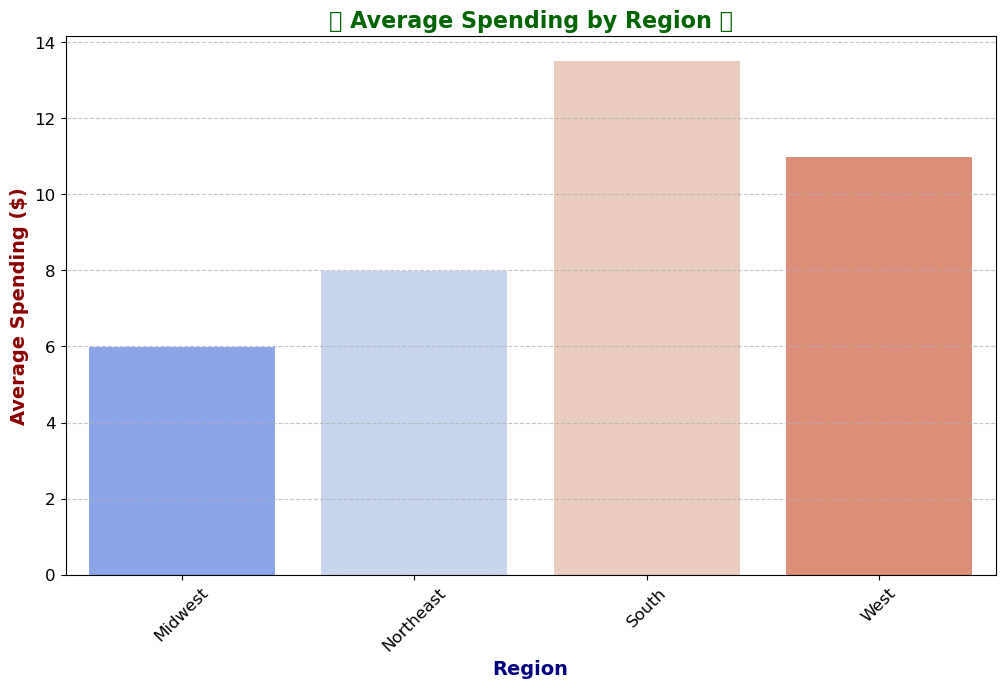

In [10]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Define save path
vis_path = r"C:\Users\Asus\OneDrive\Pictures\my python session projects\Export Visualizations as PNG Files\Analysis\Visualizations"

# Ensure the directory exists
os.makedirs(vis_path, exist_ok=True)

# Calculate average spending per region
spending_by_region = df.groupby('Region')['prices'].mean().reset_index()

## 🎨 **Matplotlib & Seaborn (Enhanced Static Visualization)**
plt.figure(figsize=(12, 7))

# Fix: Use Seaborn barplot with customized colors
sns.barplot(data=spending_by_region, x="Region", y="prices", palette="coolwarm")

# Styling
plt.xlabel("Region", fontsize=14, fontweight='bold', color='navy')
plt.ylabel("Average Spending ($)", fontsize=14, fontweight='bold', color='darkred')
plt.title("💰 Average Spending by Region 💰", fontsize=16, fontweight='bold', color='darkgreen')

# Rotate x labels for better readability
plt.xticks(rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add grid for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save high-resolution PNG
plt.savefig(os.path.join(vis_path, 'spending_by_region.png'), dpi=300, bbox_inches='tight')
plt.show()

## 🎭 **Plotly (Interactive Chart for Jupyter Notebook)**
fig = px.bar(spending_by_region, 
             x='Region', 
             y='prices', 
             color='Region', 
             title="🌍 Interactive Average Spending by Region",
             labels={'prices': 'Average Spending ($)'}, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Show interactive chart
fig.show()

# Step 6: Orders per Customer (Histogram)

C:\Users\Asus\AppData\Local\Temp\ipykernel_20780\2446349891.py:34: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

C:\Users\Asus\anaconda3\New folder\envs\20th_century\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



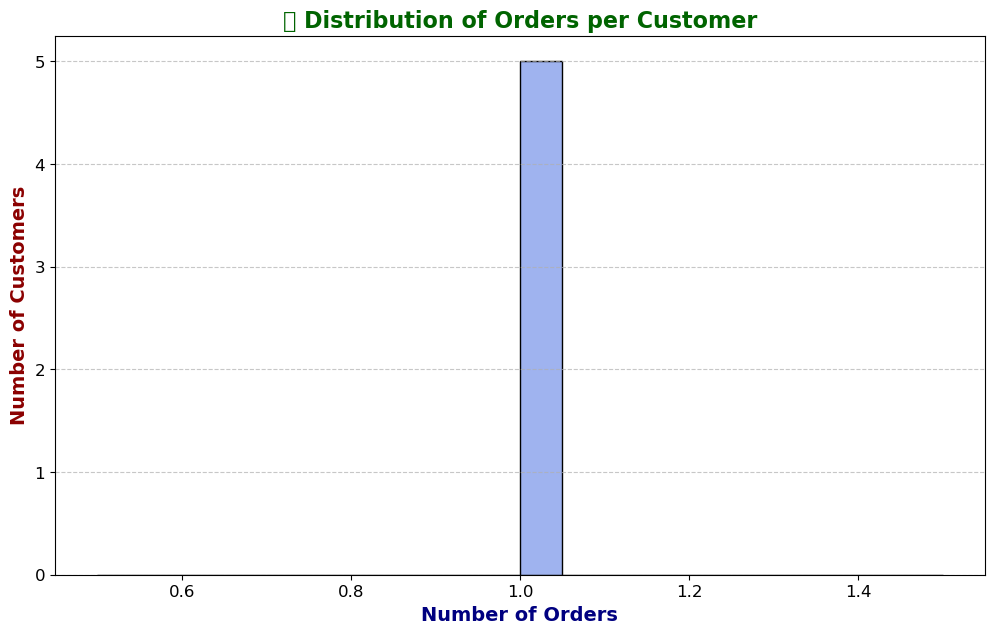

In [11]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Define save path
vis_path = r"C:\Users\Asus\OneDrive\Pictures\my python session projects\Export Visualizations as PNG Files\Analysis\Visualizations"

# Ensure the directory exists
os.makedirs(vis_path, exist_ok=True)

# Compute order distribution per customer
order_dist = df.groupby('user_id')['order_id'].count()

## 🎨 **Matplotlib & Seaborn (Enhanced Static Histogram)**
plt.figure(figsize=(12, 7))

# Fix: Use Seaborn's `histplot` for better aesthetics
sns.histplot(order_dist, bins=20, kde=True, color="royalblue", edgecolor="black")

# Styling
plt.xlabel("Number of Orders", fontsize=14, fontweight='bold', color='navy')
plt.ylabel("Number of Customers", fontsize=14, fontweight='bold', color='darkred')
plt.title("📊 Distribution of Orders per Customer", fontsize=16, fontweight='bold', color='darkgreen')

# Adjust ticks for better readability
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Grid for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save high-resolution PNG
plt.savefig(os.path.join(vis_path, 'order_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()

## 🎭 **Plotly (Interactive Histogram for Jupyter Notebook)**
fig = px.histogram(order_dist, 
                   nbins=20, 
                   title="📈 Interactive Distribution of Orders per Customer", 
                   labels={'value': 'Number of Orders', 'count': 'Number of Customers'},
                   color_discrete_sequence=['#636EFA'])

# Show interactive chart
fig.show()

# Step 7: Customer Profiles

In [13]:
def get_profile(row):
    if row['Age'] < 30 and row['income'] < 50000:
        return 'Young low-income'
    elif row['Age'] < 30 and row['income'] >= 50000:
        return 'Young high-income'
    elif row['Age'] >= 30 and row['income'] < 50000:
        return 'Older low-income'
    else:
        return 'Older high-income'

df['profile'] = df.apply(get_profile, axis=1)

# Step 8: Profile Distribution (Bar Chart)

C:\Users\Asus\AppData\Local\Temp\ipykernel_20780\2559219321.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Asus\AppData\Local\Temp\ipykernel_20780\2559219321.py:34: UserWarning:

Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.

C:\Users\Asus\anaconda3\New folder\envs\20th_century\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.



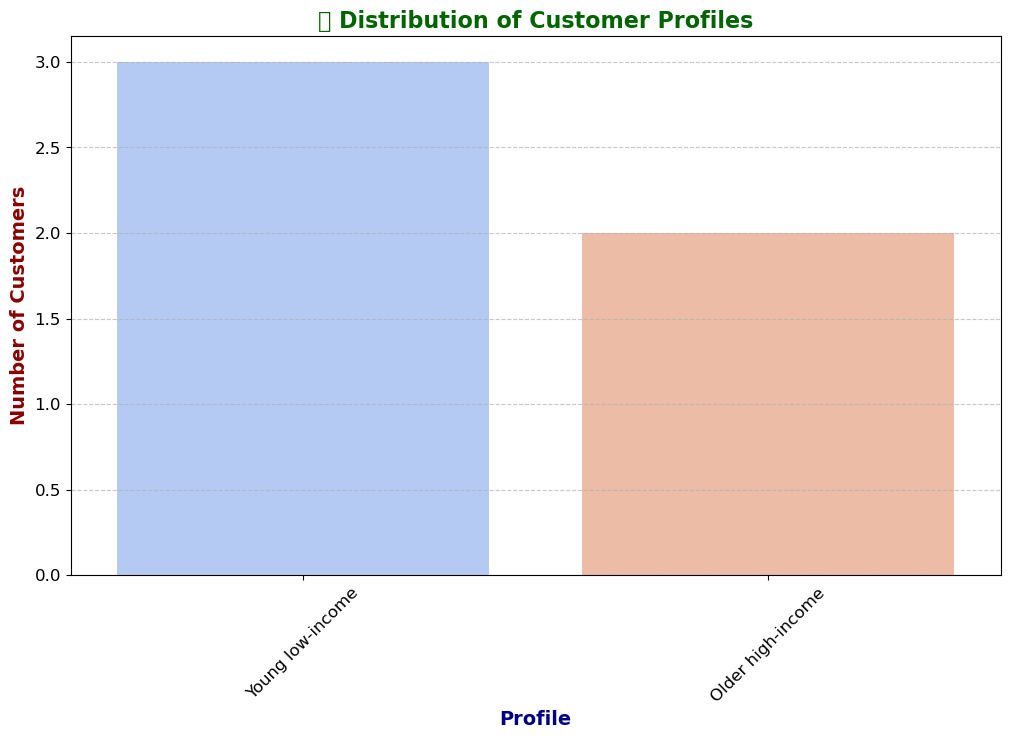

In [14]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Define save path
vis_path = r"C:\Users\Asus\OneDrive\Pictures\my python session projects\Export Visualizations as PNG Files\Analysis\Visualizations"

# Ensure the directory exists
os.makedirs(vis_path, exist_ok=True)

# Compute profile distribution
profile_dist = df['profile'].value_counts()

## 🎨 **Matplotlib & Seaborn (Enhanced Static Bar Chart)**
plt.figure(figsize=(12, 7))

# Use Seaborn's barplot for improved aesthetics
sns.barplot(x=profile_dist.index, y=profile_dist.values, palette="coolwarm")

# Styling
plt.xlabel("Profile", fontsize=14, fontweight='bold', color='navy')
plt.ylabel("Number of Customers", fontsize=14, fontweight='bold', color='darkred')
plt.title("👥 Distribution of Customer Profiles", fontsize=16, fontweight='bold', color='darkgreen')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save high-resolution PNG
plt.savefig(os.path.join(vis_path, 'profile_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()

## 🎭 **Plotly (Interactive Bar Chart for Jupyter Notebook)**
fig = px.bar(profile_dist, 
             x=profile_dist.index, 
             y=profile_dist.values, 
             color=profile_dist.index,
             title="📊 Interactive Distribution of Customer Profiles",
             labels={'x': 'Profile', 'y': 'Number of Customers'},
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Show interactive chart
fig.show()

# Step 9: Spending by Profile & Region (Stacked Bar Chart)

In [16]:
profile_agg = df.groupby('profile').agg({'order_id': ['max', 'mean', 'min'], 
                                         'prices': ['max', 'mean', 'min']}).reset_index()

In [17]:
# Flatten multi-index column names
profile_agg.columns = ['Profile', 'Max Orders', 'Mean Orders', 'Min Orders', 
                       'Max Price', 'Mean Price', 'Min Price']

C:\Users\Asus\AppData\Local\Temp\ipykernel_20780\1046290592.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Asus\AppData\Local\Temp\ipykernel_20780\1046290592.py:31: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.

C:\Users\Asus\anaconda3\New folder\envs\20th_century\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.



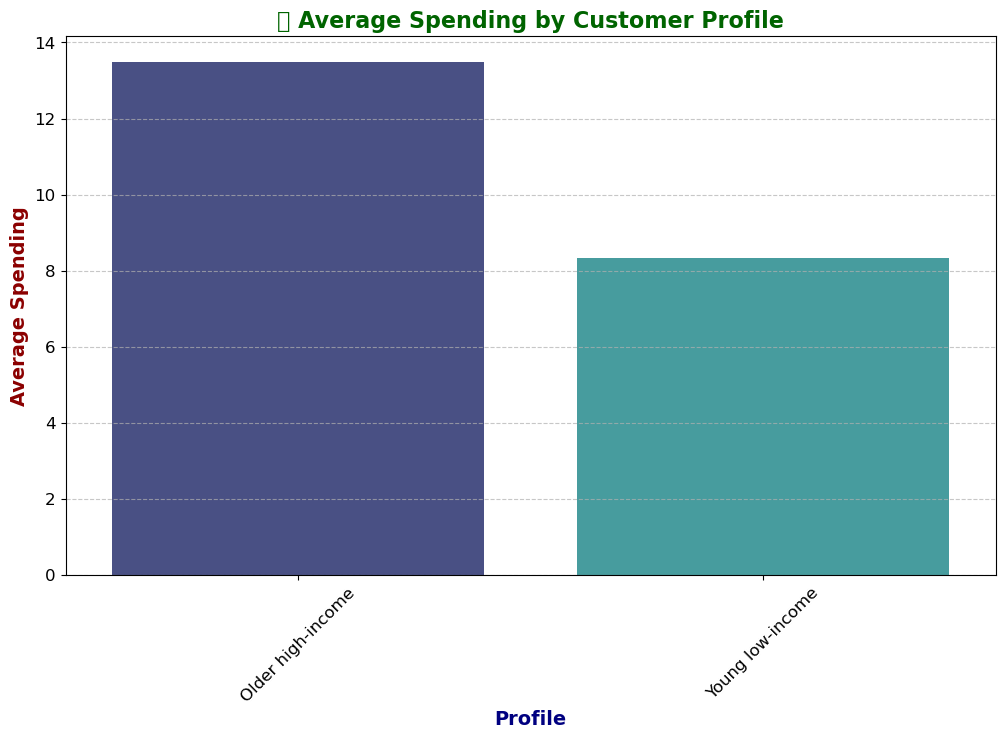

In [18]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Define save path
vis_path = r"C:\Users\Asus\OneDrive\Pictures\my python session projects\Export Visualizations as PNG Files\Analysis\Visualizations"

# Ensure the directory exists
os.makedirs(vis_path, exist_ok=True)

# 🎨 **Matplotlib & Seaborn (Enhanced Static Bar Chart)**
plt.figure(figsize=(12, 7))

# Use Seaborn's barplot for improved aesthetics
sns.barplot(x=profile_agg['Profile'], y=profile_agg['Mean Price'], palette="mako")

# Styling
plt.xlabel("Profile", fontsize=14, fontweight='bold', color='navy')
plt.ylabel("Average Spending", fontsize=14, fontweight='bold', color='darkred')
plt.title("💰 Average Spending by Customer Profile", fontsize=16, fontweight='bold', color='darkgreen')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save high-resolution PNG
plt.savefig(os.path.join(vis_path, 'avg_spending_by_profile.png'), dpi=300, bbox_inches='tight')
plt.show()

# 🎭 **Plotly (Interactive Bar Chart for Jupyter Notebook)**
fig = px.bar(profile_agg, 
             x='Profile', 
             y='Mean Price', 
             color='Profile',
             title="📊 Interactive Average Spending by Customer Profile",
             labels={'Profile': 'Profile', 'Mean Price': 'Average Spending'},
             color_discrete_sequence=px.colors.qualitative.Vivid)

# Show interactive chart
fig.show()

In [19]:
# Ensure no missing values in 'prices'
df['prices'] = pd.to_numeric(df['prices'], errors='coerce')

# Create the crosstab for Average Spending by Profile and Region
profile_region = pd.crosstab(df['profile'], df['Region'], values=df['prices'], aggfunc='mean').reset_index()

# Check the first few rows to confirm the structure
print(profile_region.head())

Region            profile  Midwest  Northeast  South   West
0       Older high-income      NaN        NaN  13.49    NaN
1        Young low-income     5.99       7.99    NaN  10.99


C:\Users\Asus\AppData\Local\Temp\ipykernel_20780\2177465865.py:28: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.



<Figure size 1200x700 with 0 Axes>

C:\Users\Asus\anaconda3\New folder\envs\20th_century\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.



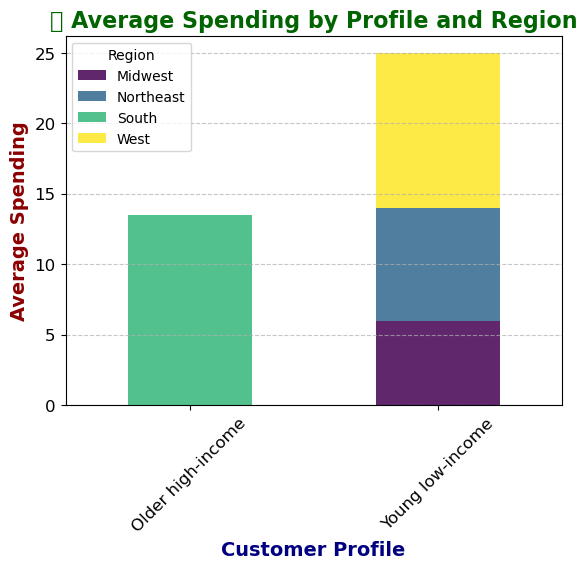

In [20]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define save path
vis_path = r"C:\Users\Asus\OneDrive\Pictures\my python session projects\Export Visualizations as PNG Files\Analysis\Visualizations"
os.makedirs(vis_path, exist_ok=True)  # Ensure the directory exists

# Set figure size
plt.figure(figsize=(12, 7))

# Use Seaborn to improve visualization aesthetics
profile_region.set_index('profile').plot(kind='bar', stacked=True, colormap="viridis", alpha=0.85)

# Improve styling
plt.xlabel("Customer Profile", fontsize=14, fontweight="bold", color="navy")
plt.ylabel("Average Spending", fontsize=14, fontweight="bold", color="darkred")
plt.title("💰 Average Spending by Profile and Region", fontsize=16, fontweight="bold", color="darkgreen")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save high-resolution PNG
plt.savefig(os.path.join(vis_path, 'profile_region_spending.png'), dpi=300, bbox_inches='tight')

# Show the static plot
plt.show()

# Step 10: Finalizing & Exporting Results

In [23]:
# Save data
df.to_csv(r"C:\Users\Asus\Music\CareerFoundry_Python_Session\final_dataset.csv", index=False)

# Save profile data
profile_region.to_csv(r"C:\Users\Asus\Music\CareerFoundry_Python_Session\profile_region_spending.csv", index=False)

print(" All data exported successfully!")

 All data exported successfully!
